In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

In [3]:
df = pd.read_csv('/home/wvuser/webvalley-dashboard/data/merged_APPA_data.csv', encoding='windows-1252')

     Year  Month     Valore
0    2012      1  31.359650
1    2012      2  35.384362
2    2012      3  32.708612
3    2012      4  25.925557
4    2012      5  28.295275
..    ...    ...        ...
122  2022      3  35.355791
123  2022      4  27.224740
124  2022      5  27.324037
125  2022      6  30.083651
126  2022      7  30.989408

[127 rows x 3 columns]


([<matplotlib.axis.XTick at 0x7f7a1a3e2250>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

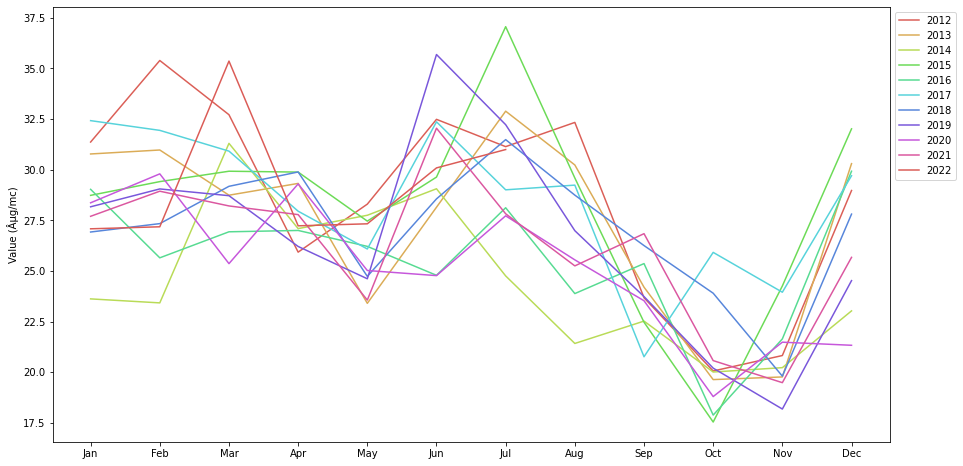

In [17]:
df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

df_year_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
df_year_avg = df_year_avg.reset_index()
df_year_avg = df_year_avg.groupby([df_year_avg.Data.dt.year, df_year_avg.Data.dt.month]).mean()
df_year_avg.index.names = ["Year", "Month"]
df_year_avg = df_year_avg.reset_index()
print(df_year_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Month", hue= "Year", palette= "hls", data=df_year_avg)
plt.ylabel('Value (Âµg/mc)')
plt.xlabel("")
plt.legend(bbox_to_anchor=(1,1), labels=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
